In [1]:
# Creating simple vector and raster test cases

<AxesSubplot:>

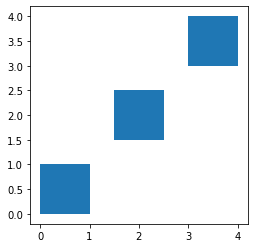

In [1]:
import geopandas as gpd
import shapely

def get_square_row(num_squares=2, translation=(1,0), square_side_len=1, origin=(0,0)):
    """
    Creates a row of squares with side length `square_side_len`, 
    each square is translated to the previous by `translation`.
    Starts with the bottom left corner of first square at
    `origin`. Returns gpd GeoDataFrame with square polygons.
    """
    
    out_df = gpd.GeoDataFrame(columns=['id', 'geometry', 'area'])
    
    square_coords = [(0,0), (1,0), (1,1), (0,1), (0,0)]
    # scaling up by square_side_len
    square_coords = [tuple([coord * square_side_len for coord in coords]) for coords in square_coords]
    # setting to origin coords
    square_coords = [[sum(x) for x in zip(coords,origin)] for coords in square_coords]
    
    square = shapely.geometry.Polygon(square_coords)
    
    for i in range(num_squares):
        xoff = i*translation[0]
        yoff = i*translation[1]
        tmp_square = shapely.affinity.translate(square, xoff=xoff, yoff=yoff)
        out_df.loc[i] = [i, tmp_square, tmp_square.area]
        
    return out_df
    
get_square_row(num_squares=3, translation=(1.5,1.5), square_side_len=1, origin=(0,0)).plot()